In [9]:
%load_ext autoreload
%autoreload 2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import numpy as np
from code.pca import customPCA

# Create a sample dataset
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Instantiate and apply PCA
pca = customPCA()
X_transformed = pca.reduce_dim(X,threshold=0.99)

print("Principal Components:")
for c in pca.components.T:
    print(f"{ c}")
print("Principal Components Eigenvalues:\n", pca.eigenvalues)
print("Principal Components Explained Variance:\n", pca.explained_variance)
print("Transformed Data:\n", X_transformed)

In [ ]:
from code.preprocessing import get_dataset
from code.pca import customPCA

# Step 1
dataset = "vowel"
x, y = get_dataset(dataset)
ds = x.copy()
ds["target"] = y

# Step 2
correlation_with_target = ds.corr()["target"] # Based on their correlation with the target
top_features = correlation_with_target.abs().sort_values(ascending=False).iloc[1:4]
top_features = top_features.index.tolist()
ds = ds.drop('target', axis=1)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(ds[top_features[0]], ds[top_features[1]], c=ds[top_features[2]], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label=f'{top_features[2]}')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f'Dataset {dataset} only representing the 3 components with more correlation with the target')
plt.show()

# Step 3 & 4 & 5 & 6 & 7 & 9
pca = customPCA(verbose=True)
X_transformed = pca.reduce_dim(ds,threshold=0.90,n_components=3)

# Step 8
# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=X_transformed[:,2], cmap='viridis', alpha=0.7)  # `viridis` is a color map, change as needed

# Add a color bar to show the gradient
plt.colorbar(scatter, label='Third Dimension (Color Gradient)')

plt.xlabel('First Component (X)')
plt.ylabel('Second Component (Y)')
plt.title(f'Dataset {dataset} after applying PCA and leaving 3 principal components')
plt.show()


In [ ]:
pca = customPCA(verbose=False)
X_transformed = pca.reduce_dim(ds,threshold=0.90,n_components=3)

pca.mean = pca.mean.values

X_reconstructed = pca.reconstruct(X_transformed)

print(X_reconstructed.shape)

In [ ]:
from sklearn import decomposition
# Step 1
dataset = "sick"
x, y = get_dataset(dataset)
ds = x.copy()
ds["target"] = y

# Step 2
correlation_with_target = ds.corr()["target"]  # Based on their correlation with the target
top_features = correlation_with_target.abs().sort_values(ascending=False).iloc[1:4].index.tolist()

ds = ds.drop('target', axis=1)
feature_indices = [ds.columns.get_loc(feature) for feature in top_features]  # Get indices of the features

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    ds.iloc[:, feature_indices[0]],  # Access by column index
    ds.iloc[:, feature_indices[1]],  # Access by column index
    c=ds.iloc[:, feature_indices[2]],  # Access by column index
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label=f'{top_features[2]}')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f'Dataset {dataset} only representing the 3 components with more correlation with the target')
plt.show()

# Step 3 & 4 & 5 & 6 & 7
pca = decomposition.PCA(n_components=3)  # Reduce to 3 components
X_transformed = pca.fit_transform(ds)

# Step 8
# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=X_transformed[:, 2], cmap='viridis',alpha=0.7)  # `viridis` is a color map, change as needed

# Add a color bar to show the gradient
plt.colorbar(scatter, label='Third Dimension (Color Gradient)')

plt.xlabel('First Component (X)')
plt.ylabel('Second Component (Y)')
plt.title(f'Dataset {dataset} after applying PCA and leaving 3 principal components')
plt.show()

# Step 9
X_reconstructed = pca.inverse_transfdeorm(X_transformed)

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    X_reconstructed[:, feature_indices[0]],  # Access by column index
    X_reconstructed[:, feature_indices[1]],  # Access by column index
    c=X_reconstructed[:, feature_indices[2]],  # Access by column index
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label=f'{top_features[2]}')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f'Dataset {dataset} only representing the 3 components with more correlation with the target')
plt.show()

In [ ]:
# Step 1: Load dataset
dataset = "sick"
x, y = get_dataset(dataset)
ds = x.copy()
ds["target"] = y

# Step 2: Select top features based on correlation with the target
correlation_with_target = ds.corr()["target"]  # Correlation with target
top_features = correlation_with_target.abs().sort_values(ascending=False).iloc[1:4].index.tolist()

# Extract feature indices for later use
ds = ds.drop('target', axis=1)
feature_indices = [ds.columns.get_loc(feature) for feature in top_features]

# Step 3: Apply Incremental PCA for dimensionality reduction
# Define mini-batches
batch_size = 100  # Set a batch size suitable for your system's memory
incremental_pca = decomposition.IncrementalPCA(n_components=3)

# Perform partial fit on mini-batches
for i in range(0, ds.shape[0], batch_size):
    batch = ds.iloc[i:i + batch_size]
    incremental_pca.partial_fit(batch)

# Transform the dataset in batches
X_transformed = np.vstack([
    incremental_pca.transform(ds.iloc[i:i + batch_size])
    for i in range(0, ds.shape[0], batch_size)
])

# Step 4: Scatter plot of PCA-transformed components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_transformed[:, 0],  # First principal component
    X_transformed[:, 1],  # Second principal component
    c=X_transformed[:, 2],  # Third principal component (as color gradient)
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Third Principal Component (Color Gradient)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'Dataset {dataset} after Incremental PCA (3 Principal Components)')
plt.show()

# Step 5: Reconstruct the original dataset from Incremental PCA components
X_reconstructed = np.vstack([
    incremental_pca.inverse_transform(X_transformed[i:i + batch_size])
    for i in range(0, X_transformed.shape[0], batch_size)
])

# Step 6: Visualize reconstructed features
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_reconstructed[:, feature_indices[0]],  # Reconstructed first feature
    X_reconstructed[:, feature_indices[1]],  # Reconstructed second feature
    c=X_reconstructed[:, feature_indices[2]],  # Reconstructed third feature (as color gradient)
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label=f'Reconstructed {top_features[2]}')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f'Reconstructed Dataset {dataset} using Incremental PCA')
plt.show()

In [3]:
from code.preprocessing import get_dataset
from code.main import compare_pca_models

dataset="sick"
x, _ = get_dataset(dataset)
ds = x.copy()

print(x.shape[1])

33


In [23]:
from code.preprocessing import get_dataset
from code.main import compare_pca_models
import numpy as np
import pandas as pd

dataset="vowel"
x, _ = get_dataset(dataset)
ds = x.copy()

results = []

for comp in range(1,x.shape[1]):
    tab = compare_pca_models(ds, n_components=comp, batch_size=33)
    new_row = [
        comp,
        np.sum(tab.iloc[0]["Explained Variance"]), tab.iloc[0]["Reconstruction Error"],
        np.sum(tab.iloc[1]["Explained Variance"]), tab.iloc[1]["Reconstruction Error"],
        np.sum(tab.iloc[2]["Explained Variance"]), tab.iloc[2]["Reconstruction Error"],
    ]

    results.append(new_row)

columns = [
    "Components",
    "cPCA Variability", "cPCA Reconstruction Error",
    "PCA Variability", "PCA Reconstruction Error",
    "iPCA Variability", "iPCA Reconstruction Error"
]

# Create a DataFrame from the data
df = pd.DataFrame(results, columns=columns)
df

,Components,cPCA Variability,cPCA Reconstruction Error,PCA Variability,PCA Reconstruction Error,iPCA Variability,iPCA Reconstruction Error
0,1,0.229406,2.126943e-01,0.229406,2.126943e-01,0.208453,2.132720e-01
1,2,0.296372,2.032426e-01,0.296372,2.032426e-01,0.257257,2.060692e-01
2,3,0.356272,1.943992e-01,0.356272,1.943992e-01,0.332137,1.967525e-01
3,4,0.409737,1.861513e-01,0.409737,1.861513e-01,0.380066,1.896714e-01
4,5,0.458559,1.782865e-01,0.458559,1.782865e-01,0.428112,1.821820e-01
5,6,0.506322,1.702414e-01,0.506322,1.702414e-01,0.475285,1.743543e-01
6,7,0.552226,1.621334e-01,0.552226,1.621334e-01,0.526686,1.655377e-01
7,8,0.597028,1.538085e-01,0.597028,1.538085e-01,0.571036,1.573031e-01
8,9,0.641356,1.451024e-01,0.641356,1.451024e-01,0.623491,1.473498e-01
9,10,0.685369,1.359077e-01,0.685369,1.359077e-01,0.668862,1.382248e-01


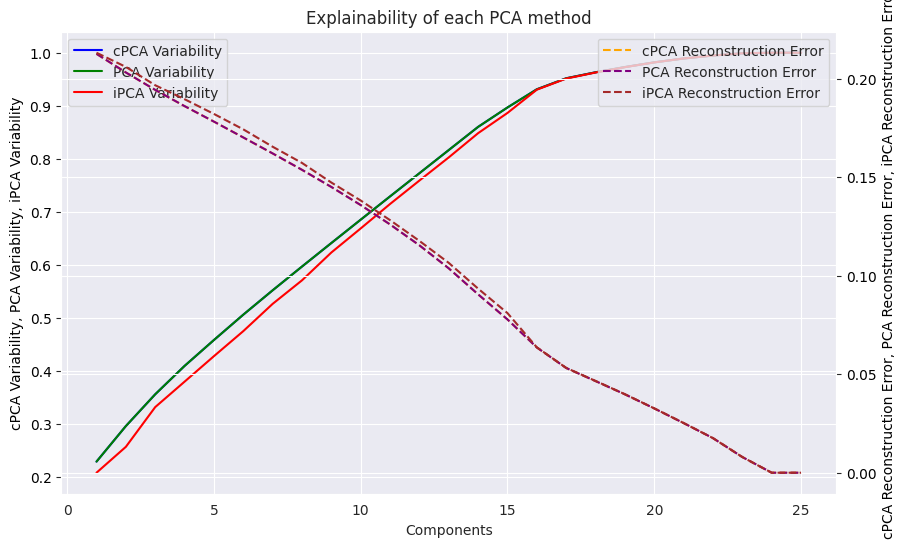

In [24]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['Components'], df['cPCA Variability'], label='cPCA Variability', color='blue', linestyle='-')
ax1.plot(df['Components'], df['PCA Variability'], label='PCA Variability', color='green', linestyle='-')
ax1.plot(df['Components'], df['iPCA Variability'], label='iPCA Variability', color='red', linestyle='-')

ax1.set_xlabel('Components')
ax1.set_ylabel('cPCA Variability, PCA Variability, iPCA Variability', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()

ax2.plot(df['Components'], df['cPCA Reconstruction Error'], label='cPCA Reconstruction Error', color='orange', linestyle='--')
ax2.plot(df['Components'], df['PCA Reconstruction Error'], label='PCA Reconstruction Error', color='purple', linestyle='--')
ax2.plot(df['Components'], df['iPCA Reconstruction Error'], label='iPCA Reconstruction Error', color='brown', linestyle='--')

ax2.set_ylabel('cPCA Reconstruction Error, PCA Reconstruction Error, iPCA Reconstruction Error', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Explainability of each PCA method')
plt.grid(True)

plt.show()
